<a href="https://colab.research.google.com/github/andrejoelalves/PML_FinalProject/blob/main/PREDICTING_COVID_DEATHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Final project***

---



***Practical Machine Learning 2023 – André Alves (27123)***

***PREDICTING COVID-19 DEATHS IN PORTUGAL***

## INTRODUCTION


The problem in investigation is based on the question: How accurately can the outcome (death or recovery) of COVID-19 patients based on their age, sex, symptoms, and comorbidities be predicted? 


The answer to the question will allow us to assess the potential of developing a decision support system that categorises patients based on the information provided to health authorities over the phone.

Using tabular data collected by health authorities of patients that tested positive for COVID-19, the survival versus death (0/1) will be predicted considering determinants of disease fatality. Although there are several studies relating health determinants (economic, social, demographic, behavioral), etc., with infection and mortality to COVID-19 in Portugal (Alves *et al*., 2023; Sá Marques *et al*., 2020; Sousa *et al*., 2021), the majority have worked in an aggregate structure with an ecological basis (regions, municipalities, etc.) so that the relationships established cannot be extrapolated to the individual level. Thus, the main distinction and relevance of this work will be the use of a dataset at the individual level and not based on a territorial unit.
To understand the significance of the problem we can imagine for a public health strategy the possibility of predicting whether a patient will survive or not using a trained model that learned the patterns to understand COVID-19 fatalities. This artificial intelligence capability would enable the development of a decision support system for adjusting personalised health interventions to patients, allowing for a more targeted follow-up to the needs of the population and therefore helping to save more lives.

The main challenge of this project is to process the information in order to make it suitable to train a machine learning model. There is a set of incomplete information that cannot be filled in with reasonable fidelity, so several lines (corresponding to infected individuals) are not complete. Thus, prior to the training of any model, there is an important work of curating the data based on cleaning and creating new variables, for example based on one-hot encoding.
Secondly, the challenge is to train a model capable of predicting the outcome of an infected individual, i.e., if the patient recovered from the disease, and then becomes a susceptible individual again, or if, on the contrary, the patient died. Obviously, modeling deaths by COVID-19 is a multifactorial phenomenon and the disease may not directly be the cause of death. For example, an infected patient may have died from another cause (e.g., heart attack) potentiated or not by the infection and still be cataloged as a COVID-19 death. So, if a model can, based on a set of variables regarding information collected by health professionals on infected patients, predict with significance whether the patient will potentially die, the model's prediction could be used to recommend patient hospitalization right after the disease is confirmed, or on the contrary the absence of such need allowing to reduce the saturation of hospital facilities. 


We will use information from COVID-19 in Portugal. The dataset in question was made available to academic researchers by the Directore-General for Health. The data used in this exercise was last updated in early March 2021, so it does not reflect the overall pandemic situation in the country. Since the information covers a period when the vaccination against the disease was very low, immunisation-related bias is not expected.

This methodological component is split into two main sections: data curation and classification.



# DATA CURATION AND EDITING

First, all needed libraries at this phase are imported.

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive

Now the dataset is accessed.

In [2]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/covidPT_dataset.csv', delimiter=';', low_memory=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Originally, this tabular dataset had 53 columns and more than 800,000 rows, with each row corresponding to an individual infected with COVID-19. This information was filled out by healthcare professionals when triaging patients infected with COVID-19, limiting it to some basic information that could customize the response from health authorities. It is important to note that this information is anonymized.

In [3]:
df

,data_confirmado,id_pessoa,idade_utente_a_data_validacao,sexo_utente,pais_nacionalidade_utente,codigo_concelho_morada_utente,descricao_concelho_morada_utente,codigo_concelho_ocorrencia,descricao_concelho_ocorrencia,regra_de_confirmacao,...,deficiencia_neurologica_cronica,insuficiencia_renal_aguda,insuficiencia_cardiaca,coagulopatia_de_consumo,durante_o_periodo_de_incubacao_esteve_fora_de_portugal,qual_o_pais,analise_1,virus_variant,virus_variant_other,data_obito
0,03/03/2020,7c973eb5f297728da3aace40fa809493e4367d323fbdbd...,NaN,M,Portugal,303.0,Braga,303.0,Braga,Caso,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,04/03/2020,79bb448c2440416002fee5f186cd661775dc23f2c3b563...,38.0,M,Portugal,1114.0,Vila Franca de Xira,1114.0,Vila Franca de Xira,Caso,...,0.0,0.0,0.0,0.0,0.0,NaN,PCR,NaN,NaN,NaN
2,04/03/2020,c75b9c2f4bc61439e00a9d21706baaea132bbd755ab0bf...,NaN,M,Portugal,1305.0,Lousada,1305.0,Lousada,Caso,...,0.0,0.0,0.0,0.0,1.0,Itália,NaN,NaN,NaN,NaN
3,05/03/2020,5ee0b12df87f6a9aa4864eeb8a76e8ab857bc46a95bb52...,43.0,M,Portugal,1105.0,Cascais,1105.0,Cascais,Caso,...,0.0,0.0,0.0,0.0,0.0,NaN,PCR,NaN,NaN,NaN
4,05/03/2020,fe93a9aa88e8487c77e7c05ed4e285165d00ab5dd300ec...,61.0,M,Portugal,603.0,Coimbra,603.0,Coimbra,Caso,...,0.0,0.0,0.0,0.0,0.0,NaN,PCR,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805135,28/02/2021,20bbfb77e719becf5a7f2d0d6a169e7d1d82aae30c6496...,NaN,M,NaN,NaN,NaN,3110.0,NaN,Caso,...,0.0,0.0,0.0,0.0,1.0,Polónia,NaN,NaN,NaN,NaN
805136,28/02/2021,d0e8879e7f701f71d3207ee901408ee42fb1e989ead1b7...,NaN,F,Portugal,3104.0,NaN,3104.0,NaN,Caso,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
805137,28/02/2021,135373d1d0a4359f3ef92d05173c9eee48b90133a403d5...,NaN,F,NaN,NaN,NaN,3110.0,NaN,Caso,...,0.0,0.0,0.0,0.0,1.0,Polónia,NaN,NaN,NaN,NaN
805138,28/02/2021,c34cc85a18e7182cd1dac61727e4682620899b976960fd...,NaN,M,Portugal,3101.0,NaN,3104.0,NaN,Caso,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


As seen below not all of the information can be used to train a machine learning model as there are numerous gaps in the 53 columns, particulary on patient symptoms and comorbidities that could be useful to predict the target variable.


In [4]:
df.isnull().sum(axis = 0)

data_confirmado                                                0
id_pessoa                                                      0
idade_utente_a_data_validacao                              65843
sexo_utente                                                  273
pais_nacionalidade_utente                                   9543
codigo_concelho_morada_utente                              19053
descricao_concelho_morada_utente                          252652
codigo_concelho_ocorrencia                                319172
descricao_concelho_ocorrencia                             444314
regra_de_confirmacao                                           0
apresentacao_da_doenca                                    461795
historia_de_febre_ou_calafrios                            598188
pneumonia                                                 742629
tosse_seca_ou_produtiva                                   578966
dispneia                                                  649260
coriza                   

Let's start cleaning the data in order to make the dataset useful.

Firstly we will create the target variable from the column "data_obito". When this column has a value (in this case the date of death) the death column takes value 1, otherwise it takes 0.

In [5]:
df['death'] = df['data_obito'].notnull().astype(int)

This new column includes almost 16 thousand individuals who died until the last data update, of which the remaining 789 thousand had not registered death. However, this information is dynamic so we do not know what proportion of the lines with a value of 0 would in a later updating became 1.

In [6]:
print(df['death'].value_counts())

0    789212
1     15928
Name: death, dtype: int64


The dataset shows a mortality rate of about 2 % of infected individuals and a  very large classe imbalance. The number of patients that survived is about 50 times larger than the ones who died.

Now we need to make the independent variables usable. First we will start with age. Bear in mind that there are some null values we will assume as the mean.

This criterion has no bibliographic support in COVID-19 datasets, so its choice lies in subjectivity, and other criterion such as the mode could have been used as an alternative.

In [7]:
age_mean = round(df['idade_utente_a_data_validacao'].mean())
print(age_mean)
if df['idade_utente_a_data_validacao'].notnull().all():
    df['age'] = df['idade_utente_a_data_validacao']
else:
    df['age'] = df['idade_utente_a_data_validacao'].fillna(age_mean).astype(int)

df

45


,data_confirmado,id_pessoa,idade_utente_a_data_validacao,sexo_utente,pais_nacionalidade_utente,codigo_concelho_morada_utente,descricao_concelho_morada_utente,codigo_concelho_ocorrencia,descricao_concelho_ocorrencia,regra_de_confirmacao,...,insuficiencia_cardiaca,coagulopatia_de_consumo,durante_o_periodo_de_incubacao_esteve_fora_de_portugal,qual_o_pais,analise_1,virus_variant,virus_variant_other,data_obito,death,age
0,03/03/2020,7c973eb5f297728da3aace40fa809493e4367d323fbdbd...,NaN,M,Portugal,303.0,Braga,303.0,Braga,Caso,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,45
1,04/03/2020,79bb448c2440416002fee5f186cd661775dc23f2c3b563...,38.0,M,Portugal,1114.0,Vila Franca de Xira,1114.0,Vila Franca de Xira,Caso,...,0.0,0.0,0.0,NaN,PCR,NaN,NaN,NaN,0,38
2,04/03/2020,c75b9c2f4bc61439e00a9d21706baaea132bbd755ab0bf...,NaN,M,Portugal,1305.0,Lousada,1305.0,Lousada,Caso,...,0.0,0.0,1.0,Itália,NaN,NaN,NaN,NaN,0,45
3,05/03/2020,5ee0b12df87f6a9aa4864eeb8a76e8ab857bc46a95bb52...,43.0,M,Portugal,1105.0,Cascais,1105.0,Cascais,Caso,...,0.0,0.0,0.0,NaN,PCR,NaN,NaN,NaN,0,43
4,05/03/2020,fe93a9aa88e8487c77e7c05ed4e285165d00ab5dd300ec...,61.0,M,Portugal,603.0,Coimbra,603.0,Coimbra,Caso,...,0.0,0.0,0.0,NaN,PCR,NaN,NaN,NaN,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805135,28/02/2021,20bbfb77e719becf5a7f2d0d6a169e7d1d82aae30c6496...,NaN,M,NaN,NaN,NaN,3110.0,NaN,Caso,...,0.0,0.0,1.0,Polónia,NaN,NaN,NaN,NaN,0,45
805136,28/02/2021,d0e8879e7f701f71d3207ee901408ee42fb1e989ead1b7...,NaN,F,Portugal,3104.0,NaN,3104.0,NaN,Caso,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,45
805137,28/02/2021,135373d1d0a4359f3ef92d05173c9eee48b90133a403d5...,NaN,F,NaN,NaN,NaN,3110.0,NaN,Caso,...,0.0,0.0,1.0,Polónia,NaN,NaN,NaN,NaN,0,45
805138,28/02/2021,c34cc85a18e7182cd1dac61727e4682620899b976960fd...,NaN,M,Portugal,3101.0,NaN,3104.0,NaN,Caso,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,45


Once the age column is completed based on the mean of 45 years old, we are going to try to make the data from the sex column usable. To do that, two new columns are created with the information relative to the "sexo_utente" column. But first we must complete the null values of the column using the modal value of the column.

In [8]:
df['sexo_utente'] = df['sexo_utente'].fillna(df['sexo_utente'].mode()[0])
df['sexo_utente'].isnull().sum()

0

In [9]:
df['sex_male'] = df['sexo_utente'].apply(lambda x: 1 if x == 'M' else 0)
df['sex_female'] = df['sexo_utente'].apply(lambda x: 1 if x == 'F' else 0)
df

,data_confirmado,id_pessoa,idade_utente_a_data_validacao,sexo_utente,pais_nacionalidade_utente,codigo_concelho_morada_utente,descricao_concelho_morada_utente,codigo_concelho_ocorrencia,descricao_concelho_ocorrencia,regra_de_confirmacao,...,durante_o_periodo_de_incubacao_esteve_fora_de_portugal,qual_o_pais,analise_1,virus_variant,virus_variant_other,data_obito,death,age,sex_male,sex_female
0,03/03/2020,7c973eb5f297728da3aace40fa809493e4367d323fbdbd...,NaN,M,Portugal,303.0,Braga,303.0,Braga,Caso,...,0.0,NaN,NaN,NaN,NaN,NaN,0,45,1,0
1,04/03/2020,79bb448c2440416002fee5f186cd661775dc23f2c3b563...,38.0,M,Portugal,1114.0,Vila Franca de Xira,1114.0,Vila Franca de Xira,Caso,...,0.0,NaN,PCR,NaN,NaN,NaN,0,38,1,0
2,04/03/2020,c75b9c2f4bc61439e00a9d21706baaea132bbd755ab0bf...,NaN,M,Portugal,1305.0,Lousada,1305.0,Lousada,Caso,...,1.0,Itália,NaN,NaN,NaN,NaN,0,45,1,0
3,05/03/2020,5ee0b12df87f6a9aa4864eeb8a76e8ab857bc46a95bb52...,43.0,M,Portugal,1105.0,Cascais,1105.0,Cascais,Caso,...,0.0,NaN,PCR,NaN,NaN,NaN,0,43,1,0
4,05/03/2020,fe93a9aa88e8487c77e7c05ed4e285165d00ab5dd300ec...,61.0,M,Portugal,603.0,Coimbra,603.0,Coimbra,Caso,...,0.0,NaN,PCR,NaN,NaN,NaN,0,61,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805135,28/02/2021,20bbfb77e719becf5a7f2d0d6a169e7d1d82aae30c6496...,NaN,M,NaN,NaN,NaN,3110.0,NaN,Caso,...,1.0,Polónia,NaN,NaN,NaN,NaN,0,45,1,0
805136,28/02/2021,d0e8879e7f701f71d3207ee901408ee42fb1e989ead1b7...,NaN,F,Portugal,3104.0,NaN,3104.0,NaN,Caso,...,NaN,NaN,NaN,NaN,NaN,NaN,0,45,0,1
805137,28/02/2021,135373d1d0a4359f3ef92d05173c9eee48b90133a403d5...,NaN,F,NaN,NaN,NaN,3110.0,NaN,Caso,...,1.0,Polónia,NaN,NaN,NaN,NaN,0,45,0,1
805138,28/02/2021,c34cc85a18e7182cd1dac61727e4682620899b976960fd...,NaN,M,Portugal,3101.0,NaN,3104.0,NaN,Caso,...,NaN,NaN,NaN,NaN,NaN,NaN,0,45,1,0


Now we will make a distinction based on patient symptons and exclude columns without data.
Basically, a symptom column was created by adding up the different type of symptoms (binary with a value of 0 for absence and 1 for symptomatic patients). Thus it will be assumed that a higher number of symptoms can help predict recovery or mortality of a patient.

In [10]:
symptoms_to_sum = ['historia_de_febre_ou_calafrios', 'pneumonia', 'tosse_seca_ou_produtiva', 'dispneia', 'coriza', 'odinofagia', 'cefaleia', 'dor_abdominal', 'dor_no_peito', 'artralgia', 'mialgias', 'nauseas_vomitos', 'diarreia', 'convulsoes', 'irritabilidade_confusao', 'fraqueza_geral_ou_astenia', 'auscultacao_pulmonar_anomala', 'radiografia_pulmonar_com_alteracoes', 'coma', 'taquicardia']
df['symptoms'] = df[symptoms_to_sum].sum(axis=1)
print(df['symptoms'].value_counts())

0.0     536224
2.0      70725
1.0      59895
3.0      58490
4.0      37169
5.0      21245
6.0      11052
7.0       5616
8.0       2678
9.0       1196
10.0       506
11.0       232
12.0        80
13.0        27
14.0         4
15.0         1
Name: symptoms, dtype: int64


However, not all symptoms matter in the same way, and there are some that are more important in characterising a severely ill patient. For example, cough was a relatively common symptom for symptomatic patients, without representing a high risk. However, dyspnea (painful breathing or shortness of breath) was symptom of more severe dieease and associated with risk of pulmonary complications (Wu *et al*., 2020), so it may be a good proxy for mortality risk.

In this way, it will be possible to better distinguish patients with mild symptoms, although with a greater number of symptoms (for example, headache, cough, runny nose, etc.) from patients with more adverse symptoms.

In [11]:
df['pneumonitis'] = df['pneumonia'].apply(lambda x: 1 if x == 1 else 0)
df['dyspnea'] = df['dispneia'].apply(lambda x: 1 if x == 1 else 0)

Let's now adopt the same approach to the comorbilities of the patients. In this way one can distinguish patients based on the degree of comorbidities. A higher number of health problems, and some specific types, can be expected to make patients more likely to not recover from the disease.

The influence of pre-existing conditions on mortality from COVID-19 has been widely studied (Wu *et al*., 2020), with more frail patients (with more comorbidities) being more likely to not recover from the disease or to survive with multiple sequelae.

In [12]:
comorbidities_to_sum = ['neoplasia', 'diabetes', 'vih_outras_imunodeficiencias', 'doenca_neurologica_ou_neuromuscular_cronica', 'asma', 'doenca_pulmonar_cronica', 'patologia_hepatica', 'doencas_hematologicas_cronicas', 'doenca_renal_cronica', 'deficiencia_neurologica_cronica', 'insuficiencia_renal_aguda', 'insuficiencia_cardiaca', 'coagulopatia_de_consumo']
df['comorbidities'] = df[comorbidities_to_sum].sum(axis=1)
print(df['comorbidities'].value_counts())

0.0    766296
1.0     30524
2.0      6339
3.0      1530
4.0       345
5.0        77
6.0        23
7.0         5
9.0         1
Name: comorbidities, dtype: int64


In [13]:
df['neoplasy'] = df['neoplasia'].apply(lambda x: 1 if x == 1 else 0)
df['chronic_pulmonary_disease'] = df['doenca_pulmonar_cronica'].apply(lambda x: 1 if x == 1 else 0)
df['chronic_renal_disease']= df['doenca_renal_cronica'].apply(lambda x: 1 if x == 1 else 0)

Now we will deal with geographical contexts and consider the muncipality of residence of the patient. It is important because there were different geographical expressions of COVID-19 infection in Portugal (Alves *et al*., 2023). 

It is possible that in regions with more cases, and therefore with more saturated health facilities and less capacity to respond, a higher mortality rate may have emerged due to the inefficiency of health systems to ensure an adequate response to the volume of recorded cases. For that an external variable based on the work of Alves *et al*. (2023) who developed an index of susceptibility to disease infection will be added by using the column related to the patients residency "descricao_concelho_morada_utente".

In [14]:
df['infection_susceptibility'] = np.where(df['descricao_concelho_morada_utente'].isin(['Lisboa', 'Porto', 'Matosinhos', 'Maia', 'Vila Nova de Gaia', 'Braga', 'Almada', 'Oeiras', 'Amadora', 'Cascais', 'Barreiro', 'Coimbra', 'Guimarães', 'Azambuja', 'Odivelas', 'Seixal', 'Aveiro', 'Entroncamento', 'Barcelos', 'Arcos de Valdevez', 'Évora', 'Vila Real', 'São João da Madeira', 'Viseu', 'Viseu', 'Faro', 'Vila Nova de Famalicão', 'Covilhã', 'Beja', 'Viana do Castelo', 'Setúbal', 'Monção', 'Felgueiras', 'Paços de Ferreira', 'Melgaço', 'Loures', 'Chaves', 'Ponte de Lima', 'Vila Nova de Cerveira', 'Santa Maria da Feira', 'Vila do Conde', 'Penafiel', 'Lousada', 'Santo Tirso', 'Santarém', 'Sines', 'Peniche', 'Torres Novas', 'Vizela', 'Vila Franca de Xira', 'Alenquer', 'Ílhavo', 'Sintra', 'Figueira da Foz', 'Espinho', 'Guarda', 'Paredes de Coura']), 1, 0)
print(df['infection_susceptibility'].value_counts())

0    459505
1    345635
Name: infection_susceptibility, dtype: int64


Basically the municipalities in red of the map on the right were added using one-hot encoding.

Map legend: a) Population density; b) Location quotient of employment in storage and auxiliary transport activities; c) Proportion of population working outside the parish of residence; d) Final susceptibility index

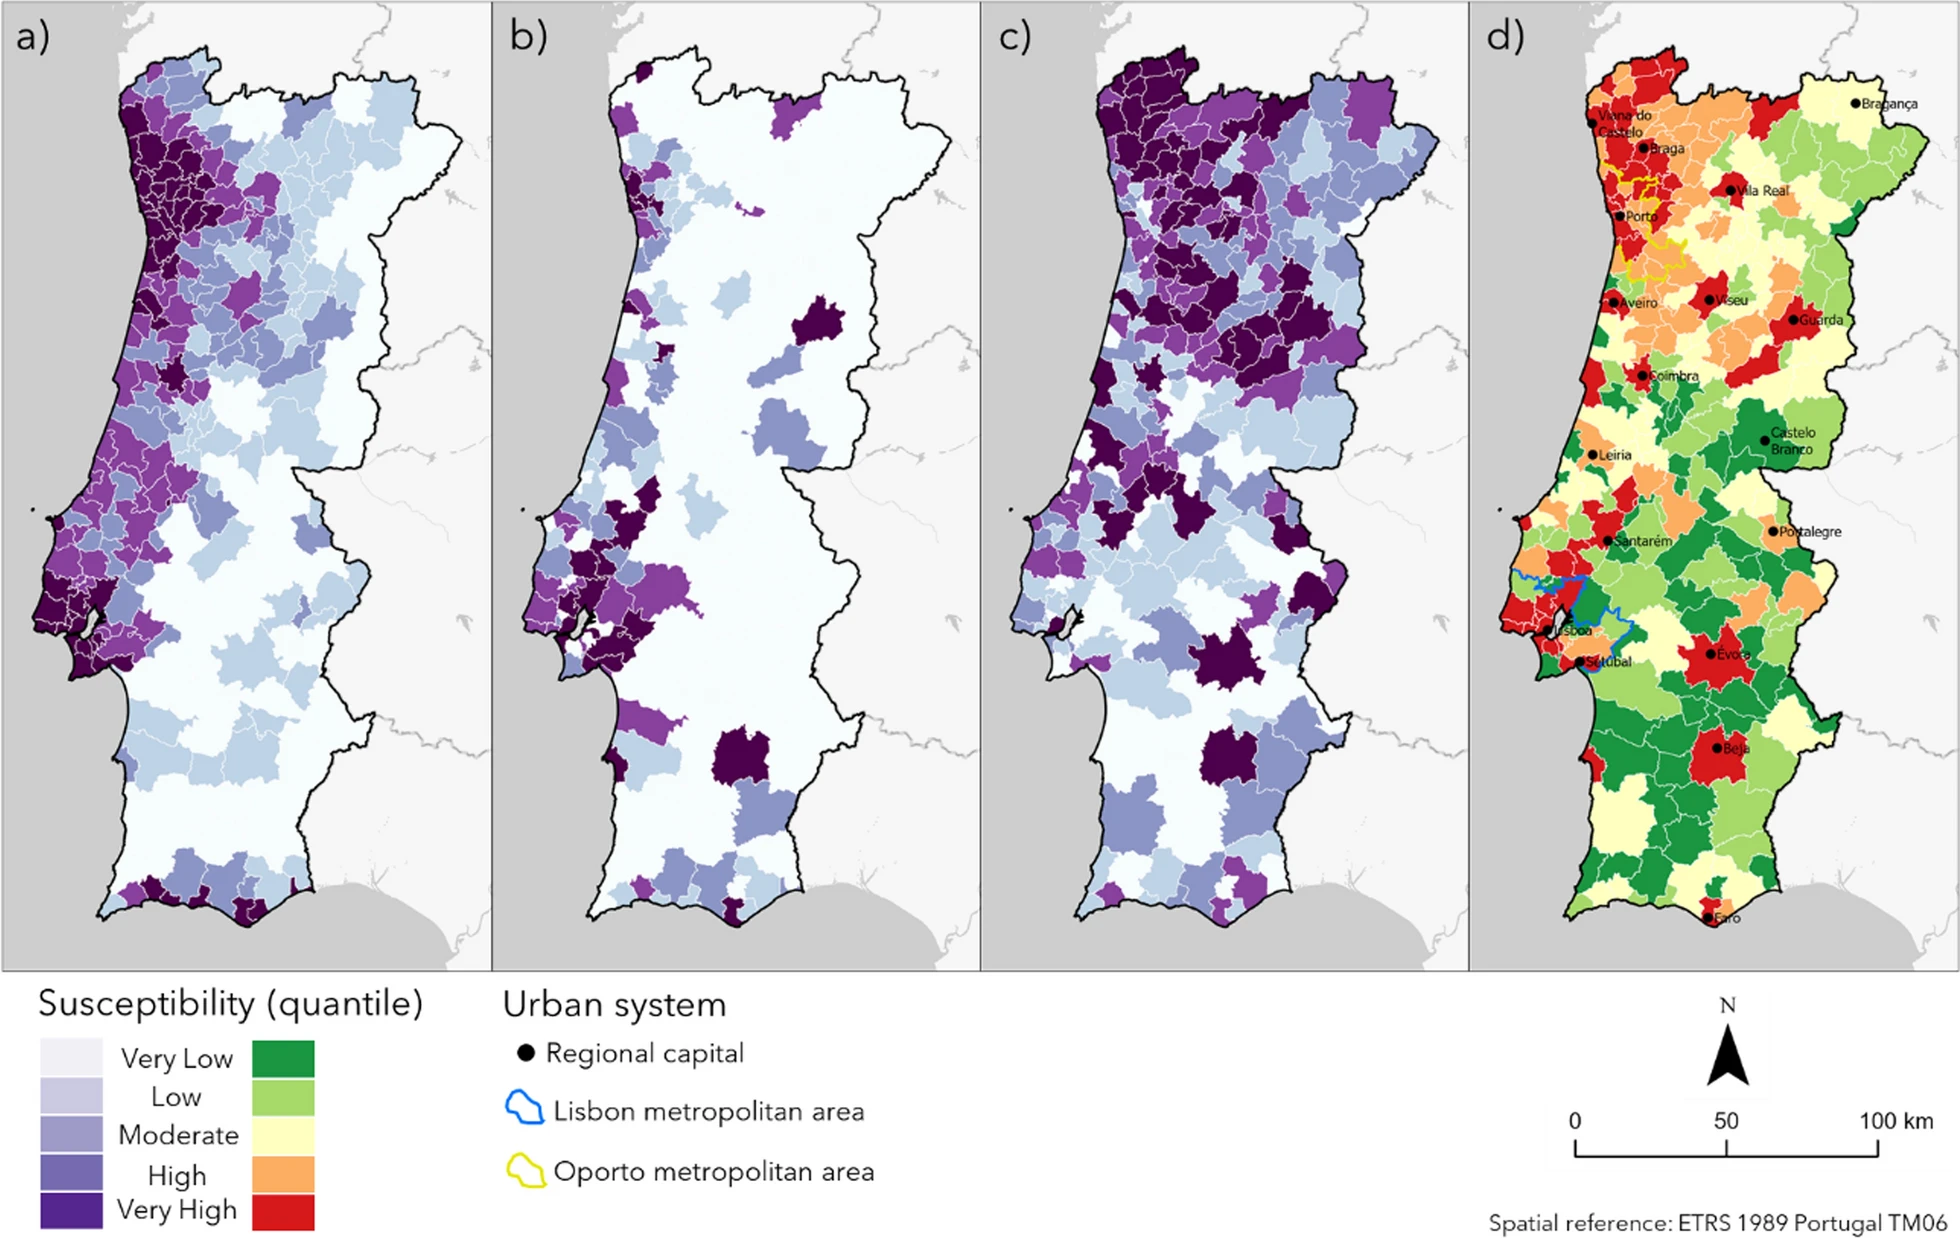

Finally the information editing phase is finished and the data is ready to be used for the supervised classification phase.

In [15]:
df

,data_confirmado,id_pessoa,idade_utente_a_data_validacao,sexo_utente,pais_nacionalidade_utente,codigo_concelho_morada_utente,descricao_concelho_morada_utente,codigo_concelho_ocorrencia,descricao_concelho_ocorrencia,regra_de_confirmacao,...,sex_male,sex_female,symptoms,pneumonitis,dyspnea,comorbidities,neoplasy,chronic_pulmonary_disease,chronic_renal_disease,infection_susceptibility
0,03/03/2020,7c973eb5f297728da3aace40fa809493e4367d323fbdbd...,NaN,M,Portugal,303.0,Braga,303.0,Braga,Caso,...,1,0,4.0,0,0,0.0,0,0,0,1
1,04/03/2020,79bb448c2440416002fee5f186cd661775dc23f2c3b563...,38.0,M,Portugal,1114.0,Vila Franca de Xira,1114.0,Vila Franca de Xira,Caso,...,1,0,2.0,0,0,0.0,0,0,0,1
2,04/03/2020,c75b9c2f4bc61439e00a9d21706baaea132bbd755ab0bf...,NaN,M,Portugal,1305.0,Lousada,1305.0,Lousada,Caso,...,1,0,4.0,0,0,0.0,0,0,0,1
3,05/03/2020,5ee0b12df87f6a9aa4864eeb8a76e8ab857bc46a95bb52...,43.0,M,Portugal,1105.0,Cascais,1105.0,Cascais,Caso,...,1,0,1.0,0,0,0.0,0,0,0,1
4,05/03/2020,fe93a9aa88e8487c77e7c05ed4e285165d00ab5dd300ec...,61.0,M,Portugal,603.0,Coimbra,603.0,Coimbra,Caso,...,1,0,3.0,0,0,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805135,28/02/2021,20bbfb77e719becf5a7f2d0d6a169e7d1d82aae30c6496...,NaN,M,NaN,NaN,NaN,3110.0,NaN,Caso,...,1,0,0.0,0,0,1.0,0,0,0,0
805136,28/02/2021,d0e8879e7f701f71d3207ee901408ee42fb1e989ead1b7...,NaN,F,Portugal,3104.0,NaN,3104.0,NaN,Caso,...,0,1,0.0,0,0,0.0,0,0,0,0
805137,28/02/2021,135373d1d0a4359f3ef92d05173c9eee48b90133a403d5...,NaN,F,NaN,NaN,NaN,3110.0,NaN,Caso,...,0,1,0.0,0,0,0.0,0,0,0,0
805138,28/02/2021,c34cc85a18e7182cd1dac61727e4682620899b976960fd...,NaN,M,Portugal,3101.0,NaN,3104.0,NaN,Caso,...,1,0,2.0,0,0,0.0,0,0,0,0


# SUPERVISED CLASSIFICATION


At this phase we have stopped curating the data and will perform data classification using a machine learning classifier. The method is question is Random Forest, an ensemble of trees that has proven accurate in machine learning problems in healthcare (Caruana *et al*., 2015; Khalilia *et al*., 2011; Zolbanin *et al*., 2015). To avoid multicolinearity due to a very imbalanced dataset (remember that value 1 in the target variable corresponds to less than 2%) a cross-validation approach with 5 folds will be used with balance of features (class_weight='balanced'). Also an additional test set is considered for model evaluation despite the cross-validation.


Results will be evaluated for model accuracy, based on the number of well-classified elements, and confusion matrix displaying true positive, true negative, false positive, and false negative predictions made by the classifier. Feature importance will also be assessed by the feature permutation algorithm.

Here all the libraries necessary for the classification and subsequent evaluation phase are imported.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Now the algorithm is trained having as target variable the column death (0/1) and the variables created in the previous stage: 'age', 'sex_male', 'sex_female', 'symptoms', 'comorbidities', 'infection_susceptibility', 'pneumonitis', 'dyspnea', 'neoplasy', 'chronic_pulmonary_disease' and 'chronic_renal_disease'.

To avoid an excessive number of splits resulting in deep trees that would make generalisation difficult, a maximum tree depth equal to the number of explanatory variables was utilised for 500 trees.

**RANDOM FOREST**

In [17]:
%%time
X = df[['age', 'sex_male', 'sex_female', 'symptoms', 'comorbidities', 'infection_susceptibility', 'pneumonitis', 'dyspnea', 'neoplasy', 'chronic_pulmonary_disease', 'chronic_renal_disease']]
y = df['death']

# randomly select 1000 samples of each class for additional test set
class_0_indices = df[df['death'] == 0].sample(n=1000).index
class_1_indices = df[df['death'] == 1].sample(n=1000).index
test_indices = class_0_indices.append(class_1_indices)

# create the additional test set and remove it from the training
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]
X_train = X.drop(test_indices)
y_train = y.drop(test_indices)

# train the RF classifier with 500 trees considering a balance of classes to deal witht the imbalanced labels
rfc = RandomForestClassifier(n_estimators=500, max_depth=11,class_weight='balanced', criterion='entropy')

# perform 5-fold stratified cross-validation on the training set and get predicted labels
cv = StratifiedKFold(n_splits=5)
y_pred = cross_val_predict(rfc, X_train, y_train, cv=cv)

# calculate accuracy and print confusion matrix
accuracy = accuracy_score(y_train, y_pred)
print("5 fold cross-validation accuracy:", accuracy)
conf_matrix = confusion_matrix(y_train, y_pred)
print("Cross-validation confusion matrix:\n", conf_matrix)

# fit the model and make predictions on the test set
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)

# calculate accuracy and print confusion matrix on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy_test)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix on test set:\n", conf_matrix_test)

5 fold cross-validation accuracy: 0.860795129118211
Cross-validation confusion matrix:
 [[678527 109685]
 [  2116  12812]]
Accuracy on test set: 0.867
Confusion matrix on test set:
 [[861 139]
 [127 873]]
CPU times: user 13min 36s, sys: 1.19 s, total: 13min 37s
Wall time: 13min 42s


The results show significance with a low proportion (14%) of examples misclassified and the model took about 15 minutes to train and predict.
However, the imbalance of the classes is reflected in the accuracy of each class, with an overestimation of the number of deaths (label 1). However, it should be taken into consideration that some of this overestimated cases may still have died (time lag between the declaration of death and the updating of this database) or cases in which patients were promptly assisted and hospitalised and medical care prevented the fatality.

In [18]:
print("Classification Report on cross-validation:")
print(classification_report(y_train, y_pred))

Classification Report on cross-validation:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    788212
           1       0.10      0.86      0.19     14928

    accuracy                           0.86    803140
   macro avg       0.55      0.86      0.56    803140
weighted avg       0.98      0.86      0.91    803140



It is quite evident in this example the low accuracy of class 1, but in the example below that refers to the additional test set (which has a balance between classes) the results are quite similar between labels and more suggestive of the possibility of implementing this model.

In [19]:
print("Classification Report on the predicted test set:")
print(classification_report(y_test, y_test_pred))

Classification Report on the predicted test set:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1000
           1       0.86      0.87      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



Here we notice that with balanced classes the model results do not overestimate (the precision and f1-score is identical in both labels), so the big disparity in the cross-validation model could be the result of the accumulation of previous discrepancies.

Regarding the importance of the variables, as expected and indicated in the literature (Wu *et al*., 2020), age is a determinant factor in recovery from the disease, and older individuals had a lower chance of survival. Dyspnea, i.e. difficulties in breathing, was also a relevant factor in class discrimination, as well as the number of comorbidities.
The patients' gender does not seem to be so relevant, as well as a set of more specific comorbidities whose representativity in the database was not very high (i.e., several null values).

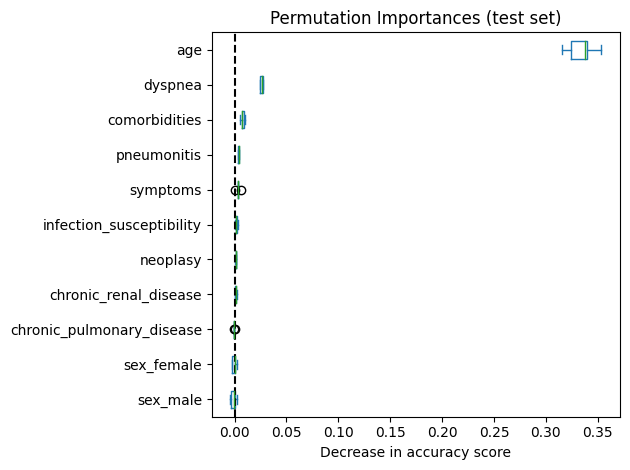

In [21]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rfc, X_test, y_test, n_repeats=5, random_state=42
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=5)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# DISCUSSION AND CONCLUSIONS

The results show that it is possible to predict quite accurately the patients who die or survive from COVID-19 infection in a pre-vaccination context in Portugal from information such as gender, age, symptomatology and comorbidities.

These findings reinforce the potential to establish a surveillance system to assist health authorities in epidemic outbreaks (Aggarwal *et al*., 2021), particularly when we think of hospital admissions  (Harper, 2002) thinking that it is possible to triage patients and their needs from the information collected.

The model's accuracy was higher than 86% highlighting the valuable contribution of the data gathered by health authorities to triage the patients. Although there was an overestimation of mortality (predicted 1 but actual 0), it was particularly good at recall meaning that it identified virtually all cases of COVID-19 that died. Again it is reinforced that some of these overestimated cases may have been hospitalised with adequate healthcare and therefore their outcome differed from the prediction, as there were thousands of people hospitalised with COVID-19 in Portugal, with a peak of 7,000 at one time.

An ideal classification would include as much information about a patient as possible. In this case we adopted a pragmatic approach that is possible to put into practice whenever a new case of the disease would be confirmed and then triaged via telephone regarding its symptomatology and comorbidities.

Now let's imagine that the current model was deployed during the peaks of wave infections. A confirmed patient by getting in contact with the medical authorities would automatically be added to the database and predicted whether or not the patients characteristics would pose susceptibility to death.

Future developments could consider improving the model by using categorical embeddings of symptoms and comorbidities. Although tests have been carried out with models that deal with class imbalance, such as SMOTE and ADASYN without reaching much better results, it may be interesting to test additional techniques with the same purpose, evaluating which type of model can help the most to solve the imbalance problem in this database.

It is also necessary to highlight some limitations of this work.
Considering the implementation of a real-time predictive system, the model should also be trained every time new data enters the table.
Despite their high-predictive performance, Random Forest and other models based on emsemble of classifiers lose out to other models by the fact that their predictions usually take a long time (Partalas *et al*., 2008) which may be an obstacle in a context of a high number of patients (e.g., millions).
Moreover, in a public health context where the interpretability of models is crucial, the importance of variables in this model is more complex than for example from a logistic regression where it is possible to obtain the odd ratios.

The potential of this solution no longer lies in COVID-19 because the vaccination coverage is very high and the pandemic has been declared over. However, in a future situation during an infection outbreak with similar dynamics the collection of information and its processing by machine learning algorithms is essential for the effective implementation of evidence-based public health strategies.

# REFERENCES



*   Aggarwal, L., Goswami, P., & Sachdeva, S. (2021). Multi-criterion Intelligent Decision Support system for COVID-19. Applied Soft Computing, 101, 107056. https://doi.org/10.1016/j.asoc.2020.107056

*   Alves, A., da Costa, N. M., Morgado, P., & da Costa, E. M. (2023). Uncovering COVID-19 infection determinants in Portugal: towards an evidence-based spatial susceptibility index to support epidemiological containment policies. International Journal of Health Geographics, 22(1), 8. https://doi.org/10.1186/s12942-023-00329-4

*   Caruana, R., Lou, Y., Gehrke, J., Koch, P., Sturm, M., & Elhadad, N. (2015). Intelligible models for healthcare: Predicting pneumonia risk and hospital 30-day readmission. Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, 2015-Augus, 1721–1730. https://doi.org/10.1145/2783258.2788613

*   Harper, P. R. (2002). A framework for operational modelling of hospital resources. Health Care Management Science, 5(3), 165–173. https://doi.org/10.1023/A:1019767900627

*   Khalilia, M., Chakraborty, S., & Popescu, M. (2011). Predicting disease risks from highly imbalanced data using random forest. BMC Medical Informatics and Decision Making, 11(1), 51. https://doi.org/10.1186/1472-6947-11-51

*   Partalas, I., Tsoumakas, G., & Vlahavas, I. (2008). Focused ensemble selection: A diversity-based method for greedy ensemble selection. Frontiers in Artificial Intelligence and Applications, 178(January), 117–121. https://doi.org/10.3233/978-1-58603-891-5-117

*   Sá Marques, T., Santos, H., Honório, F., Ferreira, M., Ribeiro, D., & Torres, M. (2020). The Territorial Mosaic Of Contagion And Mortality Risk By Covid-19 In Mainland Portugal. Finisterra, 55(115), 19–26. https://doi.org/10.18055/Finis20383

*   Sousa, P., Marques da Costa, N., Marques da Costa, E., Rocha, J., Peixoto, V. R., Fernandes, A. C., Gaspar, R., Duarte-Ramos, F., Abrantes, P., & Leite, A. (2021). COMPRIME - COnhecer Mais PaRa Intervir MElhor: Preliminary Mapping of Municipal Level Determinants of COVID-19 Transmission in Portugal at Different Moments of the 1st Epidemic Wave. Portuguese Journal of Public Health, March. https://doi.org/10.1159/000514334

*   Wu, C., Chen, X., Cai, Y., Xia, J., Zhou, X., Xu, S., Huang, H., Zhang, L., Zhou, X., Du, C., Zhang, Y., Song, J., Wang, S., Chao, Y., Yang, Z., Xu, J., Zhou, X., Chen, D., Xiong, W., … Song, Y. (2020). Risk Factors Associated with Acute Respiratory Distress Syndrome and Death in Patients with Coronavirus Disease 2019 Pneumonia in Wuhan, China. JAMA Internal Medicine, 180(7), 934–943. https://doi.org/10.1001/jamainternmed.2020.0994

*   Zolbanin, H. M., Delen, D., & Hassan Zadeh, A. (2015). Predicting overall survivability in comorbidity of cancers: A data mining approach. Decision Support Systems, 74, 150–161. https://doi.org/10.1016/j.dss.2015.04.003













